# Scatterplots And Correlation

If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

the correlation between two numeric variables is given by the Pearson correlation coefficient which statistic quantifies the strength of **linear correlation** (only this one!) between two numeric variables. The correlation coefficient ranges from −1 to 1. It can be interpret as follows, given two numeric point X and Y:
- A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases as X increases. 
- A value of −1 implies that all data points lie on a line for which Y decreases as X increases. 
- A value of 0 implies that there is no linear correlation between the variables.

Indicating with r the Pearson correlation coefficient, even if the r coefficient is equal across multiple dataset their distribution shape can be bery different, as already shown by the ascombe quartet where r=0.816 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/425px-Anscombe%27s_quartet_3.svg.png'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# this allow to use matplotlib in the notebook
%matplotlib inline 

# importing data
df = pd.read_csv('./data/fuel_econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


To analyze the correlation between two values we can use a scatterplot.

One basic way of creating a scatterplot is through Matplotlib's scatter function

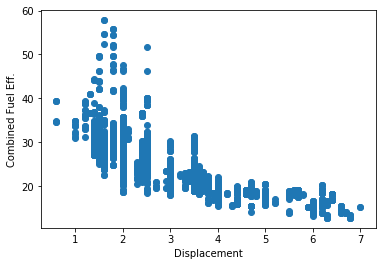

In [2]:
plt.scatter(data=df, x='displ', y='comb')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff.');

an alternative approach is to use the seaborn function regplot which combines scatterplot creation with regression function fitting:

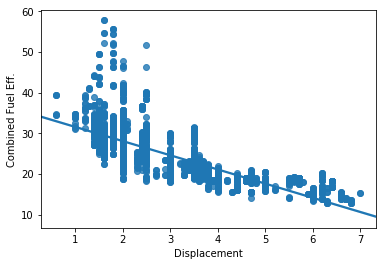

In [3]:
sb.regplot(data=df, x='displ', y='comb')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff.');

it's possibile to turn off the regression line by setting to False the parameter fit_reg

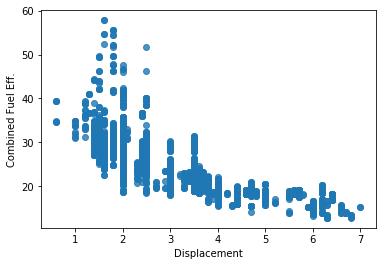

In [4]:
sb.regplot(data=df, x='displ', y='comb', fit_reg=False)
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff.');

### Overplotting Transparency And Jitter

If we have a very large number of points to plot or our numeric variables are discrete-valued, then the visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables. A possibile solution to this issue are:
- sampling
- transparency
- jitter

Let's see how we can use transparency and jitter

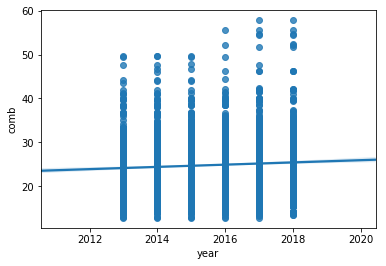

In [5]:
sb.regplot(data=df, x='year', y='comb');

add now jitter which adds uniform random noise of this size to either the x or y variables. The noise is added to a copy of the data after fitting the regression, and only influences the look of the scatterplot. This can be helpful when plotting variables that take discrete values.

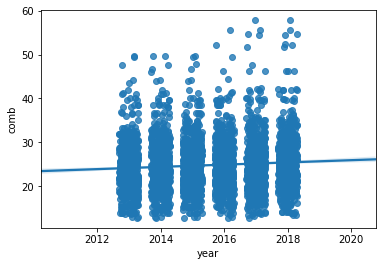

In [6]:
sb.regplot(data=df, x='year', y='comb', x_jitter=0.3);

Let's add the transparency. to do that we have to use scatter_kws parameter as follow

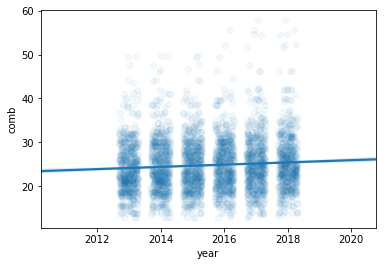

In [7]:
sb.regplot(data=df, x='year', y='comb', x_jitter=0.3,
          scatter_kws={'alpha' : 1/20});

## HeatMap

A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. 

heat maps is:
- good for discrete variable vs discrete variable
- good alternative to transparency for a lot of data

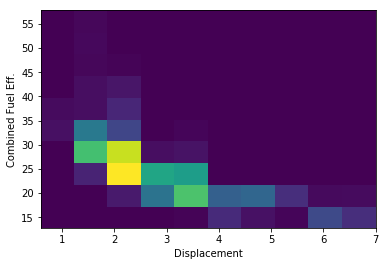

In [8]:
plt.hist2d(data=df, x='displ', y='comb')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff.');

We add a colorbar function call to add a colorbar to the side of the plot, showing the mapping from counts to colors.

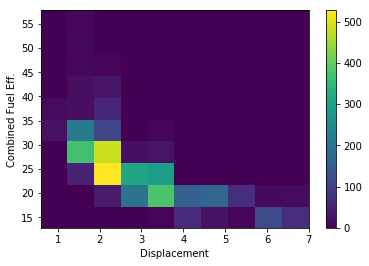

In [9]:
plt.hist2d(data=df, x='displ', y='comb')
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff.');

As the color in the heatmap gets brighter and moves from blue to yellow, the higher the count of points in the corresponding cell.

Let's improve it making the chart mor clear and readable by:
- avoiding to color blocks that doesn't have a value -> NaN to distinguish cells with zero counts from those with non-zero counts and it's possibile by settinh the "cmin" parameter which specifies the minimum value in a cell before it will be plotted
- reversing the color heat map in order to have in purple the dense points by setting the "cmap" parameter
- set the x and y bins

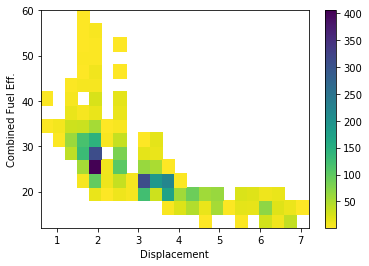

In [10]:
bins_x = np.arange(0.6,7+0.3, 0.3)
bins_y = np.arange(12,58+3, 3)

plt.hist2d(data=df, x='displ', y='comb',
          cmin=0.5,
          cmap='viridis_r',
          bins =[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff.');

If we have a lot of data, we might want to add annotations to cells in the plot indicating the count of points in each cell.

NOTE

this requires to reshape the bin size, otherwise we can have issues in the plotting numbers inside the cells

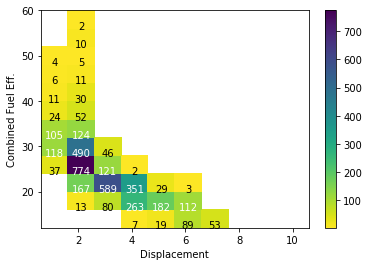

In [32]:
bins_x = np.arange(0.6,10.7+0.3, 1)
bins_y = np.arange(12,58+3, 4)

h2d = plt.hist2d(data=df, x='displ', y='comb',
          cmin=0.5,
          cmap='viridis_r',
          bins =[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff.')

counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')